In [ ]:
!pip install tensorflow
!pip install -q keras

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
df=pd.read_csv('/content/drive/MyDrive/machinelearning/diabetes_prediction_dataset.csv')

Mounted at /content/drive/


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df['gender'].value_counts()


Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [ ]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

one hot encoding using sklearn

In [ ]:
#categorical columns
df_cat=df.select_dtypes(object)
df_cat.reset_index(drop=True,inplace=True)

In [ ]:
#numeric columns
df_num=df.select_dtypes(include=[np.number])
df_num.reset_index(drop=True,inplace=True)

In [ ]:
df_num.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [ ]:
#label encoding
for col in df_cat:
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[col])
df_cat.head()

,gender,smoking_history
0,0,4
1,0,0
2,1,4
3,0,1
4,1,1


In [ ]:
dataset=pd.concat([df_num,df_cat],axis=1)

In [ ]:
dataset.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender,smoking_history
0,80.0,0,1,25.19,6.6,140,0,0,4
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,4
3,36.0,0,0,23.45,5.0,155,0,0,1
4,76.0,1,1,20.14,4.8,155,0,1,1


<Axes: >

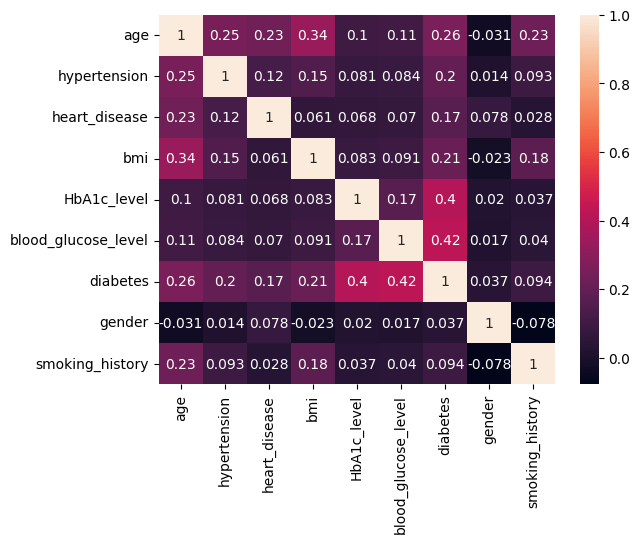

In [ ]:
#correlation
correlation=dataset.corr()
seaborn.heatmap(correlation,annot=True)

In [ ]:
features=dataset[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level','smoking_history','gender']]
target=dataset.diabetes

In [ ]:
#imbalanced
target.value_counts()



0    91500
1     8500
Name: diabetes, dtype: int64

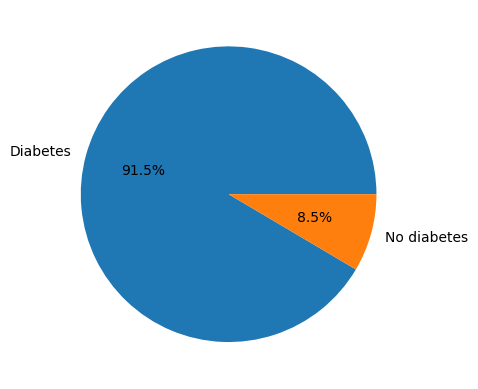

In [ ]:
#showing imbalanced dataset
im=np.array([91500,8500])
myLabels=["Diabetes","No diabetes"]
plt.pie(im,labels=myLabels,autopct="%.1f%%")
plt.show()


In [ ]:
#smote for handling imbalance dataset
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
feature_sm,target_sm=smote.fit_resample(features,target)

target_sm.value_counts()

0    91500
1    91500
Name: diabetes, dtype: int64

In [ ]:
#train-test split
feature_train,feature_test,target_train,target_test=train_test_split(feature_sm,target_sm,test_size=0.3,stratify=target_sm)
target_train.value_counts()

0    64050
1    64050
Name: diabetes, dtype: int64

In [ ]:
target_test.value_counts()

1    27450
0    27450
Name: diabetes, dtype: int64

**Logistic regression**

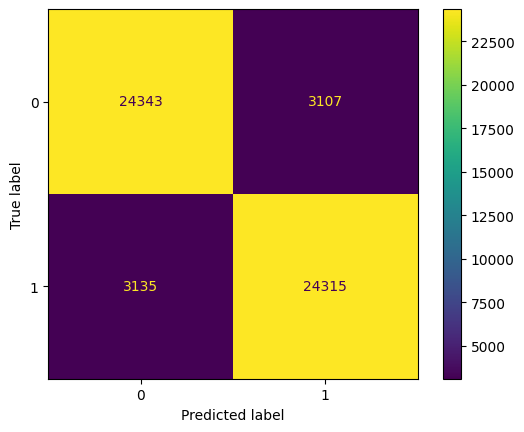

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     27450
           1       0.89      0.89      0.89     27450

    accuracy                           0.89     54900
   macro avg       0.89      0.89      0.89     54900
weighted avg       0.89      0.89      0.89     54900

0.8863023679417122


In [ ]:
from sklearn.linear_model import LogisticRegression

#feature scaling
sc=StandardScaler()
feature_train=sc.fit_transform(feature_train)
feature_test=sc.transform(feature_test)

model=LogisticRegression()
fittedmodel=model.fit(feature_train,target_train)
predictions=fittedmodel.predict(feature_test) #prediction made by the model

#confusion matrix
cm=confusion_matrix(target_test,predictions) # compare actual values(default) in the dataset and predicted value by the model
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#classification report
print(classification_report(target_test,predictions))

#print accuracy store
print(accuracy_score(target_test,predictions))




**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

#feature scaling
sc=StandardScaler()
feature_train=sc.fit_transform(feature_train)
feature_test=sc.transform(feature_test)

k_range=list(range(1,100))
param_grid=dict(n_neighbors=k_range)
model=GridSearchCV(KNeighborsClassifier(),param_grid,scoring='accuracy')
fittedmodel=model.fit(feature_train,target_train)
print("Best Parameter with Grid Search:",model.best_params_)


Best Parameter with Grid Search: {'n_neighbors': 1}


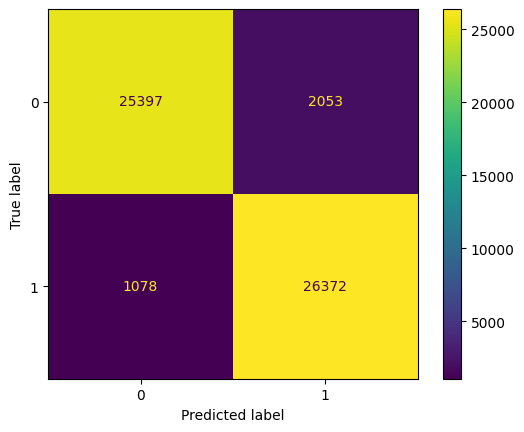

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     27450
           1       0.93      0.96      0.94     27450

    accuracy                           0.94     54900
   macro avg       0.94      0.94      0.94     54900
weighted avg       0.94      0.94      0.94     54900

0.9429690346083789


In [ ]:
model1=KNeighborsClassifier(n_neighbors=1)

predictions=fittedmodel.predict(feature_test) #prediction made by the model

#confusion matrix
cm=confusion_matrix(target_test,predictions) # compare actual values(default) in the dataset and predicted value by the model
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#classification report
print(classification_report(target_test,predictions))

#print accuracy store
print(accuracy_score(target_test,predictions))

**Naive bayes**

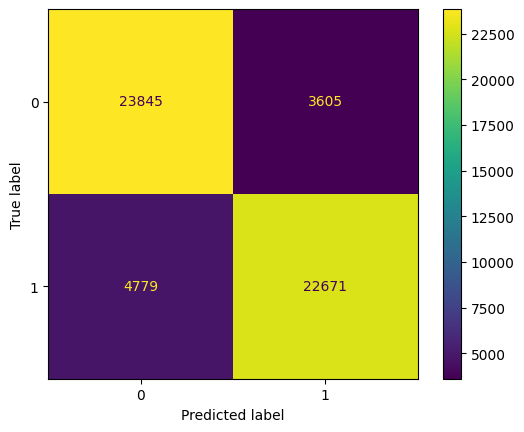

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     27450
           1       0.86      0.83      0.84     27450

    accuracy                           0.85     54900
   macro avg       0.85      0.85      0.85     54900
weighted avg       0.85      0.85      0.85     54900

0.8472859744990893


In [ ]:
from sklearn.naive_bayes import GaussianNB


model=GaussianNB()
fittedmodel=model.fit(feature_train,target_train)
predictions=fittedmodel.predict(feature_test) #prediction made by the model

#confusion matrix
cm=confusion_matrix(target_test,predictions) # compare actual values(default) in the dataset and predicted value by the model
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#classification report
print(classification_report(target_test,predictions))

#print accuracy store
print(accuracy_score(target_test,predictions))

**SVM**

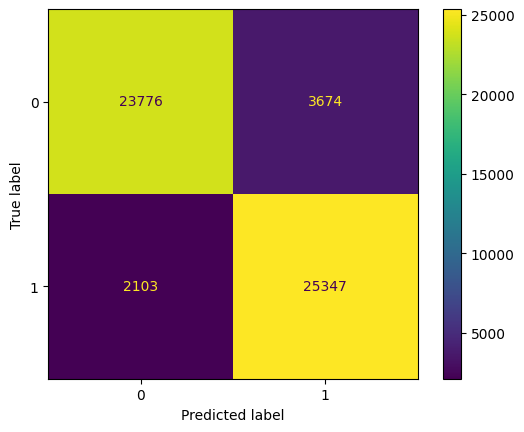

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     27450
           1       0.87      0.92      0.90     27450

    accuracy                           0.89     54900
   macro avg       0.90      0.89      0.89     54900
weighted avg       0.90      0.89      0.89     54900

0.8947723132969034


In [ ]:
from sklearn import svm


model=svm.SVC()
fittedmodel=model.fit(feature_train,target_train)
predictions=fittedmodel.predict(feature_test) #prediction made by the model

#confusion matrix
cm=confusion_matrix(target_test,predictions) # compare actual values(default) in the dataset and predicted value by the model
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#classification report
print(classification_report(target_test,predictions))

#print accuracy store
print(accuracy_score(target_test,predictions))

In [ ]:
from sklearn.svm import SVC

param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001]}
model=GridSearchCV(SVC(),param_grid)
fittedmodel=model.fit(feature_train,target_train)
print("Best Parameter with Grid Search:",model.best_params_)
predictions=fittedmodel.predict(feature_test) #prediction made by the model

#confusion matrix
cm=confusion_matrix(target_test,predictions) # compare actual values(default) in the dataset and predicted value by the model
print(cm)
#plot confusion matrix
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#classification report
print(classification_report(target_test,predictions))

#print accuracy store
print(accuracy_score(target_test,predictions))

**Decision Tree**

Best Parameter with Grid Search: {'max_depth': 9}


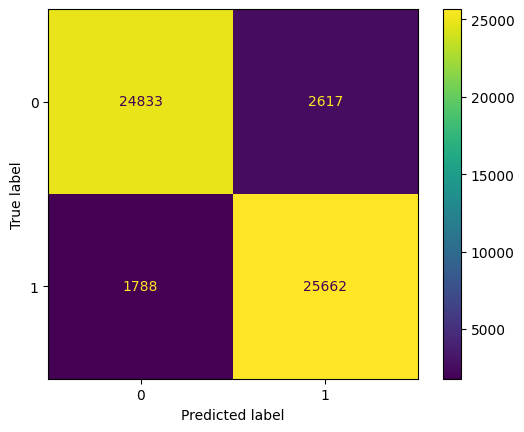

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     27450
           1       0.91      0.93      0.92     27450

    accuracy                           0.92     54900
   macro avg       0.92      0.92      0.92     54900
weighted avg       0.92      0.92      0.92     54900

0.9197632058287796


In [ ]:
from sklearn.tree import DecisionTreeClassifier


param_grid={'max_depth':np.arange(1,10)}  #which creates a numpy array with int 1 to 10.we are going to  upto max depth

model=GridSearchCV(DecisionTreeClassifier(),param_grid)
fittedmodel=model.fit(feature_train,target_train)
print("Best Parameter with Grid Search:",model.best_params_)
predictions=fittedmodel.predict(feature_test)#prediction made by the model

#confusion matrix
cm=confusion_matrix(target_test,predictions) # compare actual values(default) in the dataset and predicted value by the model
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#classification report
print(classification_report(target_test,predictions))

#print accuracy store
print(accuracy_score(target_test,predictions))



**Random Forest **

In [ ]:
from sklearn.ensemble import RandomForestClassifier


param_grid={
    "n_estimators":[10,100,500,1000],
    "max_depth":[1,5,10,15],
    "min_samples_leaf":[1,2,3,4,5,10,15,20,30,40,50]
}

model=RandomForestClassifier(max_features='sqrt')
grid_search=GridSearchCV(model,param_grid)
fittedmodel=grid_search.fit(feature_train,target_train)
predictions=fittedmodel.predict(feature_test) #prediction made by the model
print("best parameters found",grid_search.best_params)

#confusion matrix
cm=confusion_matrix(target_test,predictions) # compare actual values(default) in the dataset and predicted value by the model
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#classification report
print(classification_report(target_test,predictions))

#print accuracy store
print(accuracy_score(target_test,predictions))

**Boosting**

Best Parameter with Grid Search: {'learning_rate': 1.0, 'n_estimators': 1000}


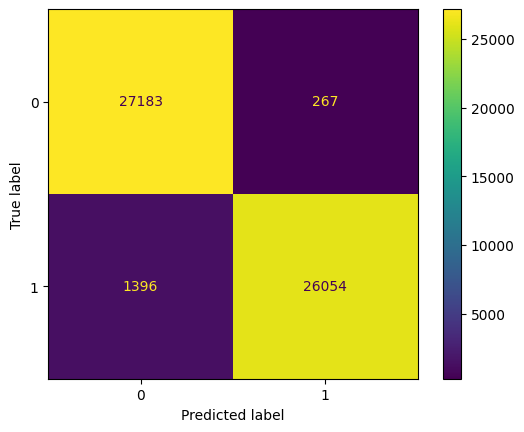

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27450
           1       0.99      0.95      0.97     27450

    accuracy                           0.97     54900
   macro avg       0.97      0.97      0.97     54900
weighted avg       0.97      0.97      0.97     54900

0.9697085610200364


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

param_grid={
    "n_estimators":[10,100,500,1000],
    "learning_rate":[0.0001,0.001,0.01,0.1,1.0],

}
model=GridSearchCV(AdaBoostClassifier(),param_grid)
fittedmodel=model.fit(feature_train,target_train)
print("Best Parameter with Grid Search:",model.best_params_)
predictions=fittedmodel.predict(feature_test)#prediction made by the model

#confusion matrix
cm=confusion_matrix(target_test,predictions) # compare actual values(default) in the dataset and predicted value by the model
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#classification report
print(classification_report(target_test,predictions))

#print accuracy store
print(accuracy_score(target_test,predictions))

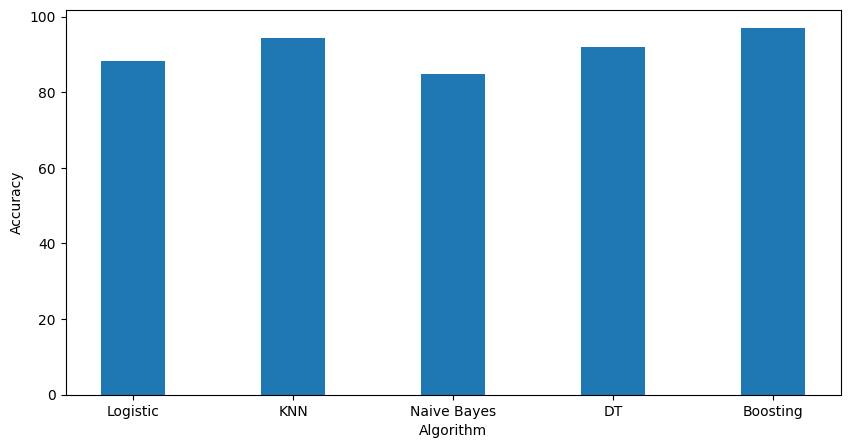

In [ ]:
data={'Logistic':88.37,'KNN':94.29,'Naive Bayes':84.72,'DT':91.98,'Boosting':96.98}
algos=list(data.keys())
values=list(data.values())

fig=plt.figure(figsize=(10,5))

plt.bar(algos,values,width=0.4)
plt.xlabel("Algorithm")
plt.ylabel('Accuracy')
plt.title("comaparison for all ML ")
plt.show()